In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/door-dash/datasets/historical_data.csv


In [2]:
ddash = pd.read_csv('/kaggle/input/door-dash/datasets/historical_data.csv')

In [3]:
ddash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [4]:
ddash.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0


In [5]:
ddash[ddash.duplicated(keep=False)]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration


In [6]:
ddash.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [7]:
threshold = int(len(ddash) * 0.05)
print(threshold)

9871


In [8]:
cols_to_drop = ddash.columns[ddash.isna().sum() <= threshold]
print(cols_to_drop)

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')


In [9]:
ddash.dropna(subset=cols_to_drop, inplace=True)

In [10]:
cols_with_missing_values = ddash.columns[ddash.isna().sum()>0]
print(cols_with_missing_values)

Index(['total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders'],
      dtype='object')


In [11]:
ddash['created_at'] = pd.to_datetime(ddash['created_at'])
ddash['actual_delivery_time'] = pd.to_datetime(ddash['actual_delivery_time'])

ddash['actual_total_delivery_duration'] = (ddash['actual_delivery_time'] - ddash['created_at']).dt.seconds

In [12]:
ddash['actual_total_delivery_duration'] = (ddash['actual_delivery_time'] - ddash['created_at']).dt.total_seconds()

In [13]:
store_category_wait_times_mean = ddash.groupby('store_primary_category')['actual_total_delivery_duration'].mean().sort_values(ascending=False)

In [14]:
store_category_wait_times_mean / 60

store_primary_category
italian        70.329332
spanish        56.178378
caribbean      56.111111
brazilian      55.724405
belgian        54.991667
                 ...    
fast           43.852149
gluten-free    42.028495
kosher         41.576144
indonesian     40.750000
chocolate      34.133333
Name: actual_total_delivery_duration, Length: 74, dtype: float64

In [15]:
ddash.groupby('store_primary_category')['estimated_store_to_consumer_driving_duration'].mean().sort_values(ascending=False) / 60

store_primary_category
alcohol-plus-food    13.183333
indonesian           10.908333
soup                 10.494369
caribbean            10.302579
malaysian            10.119865
                       ...    
gastropub             7.942391
european              7.834091
tapas                 7.010532
moroccan              6.884000
convenience-store     6.733189
Name: estimated_store_to_consumer_driving_duration, Length: 74, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


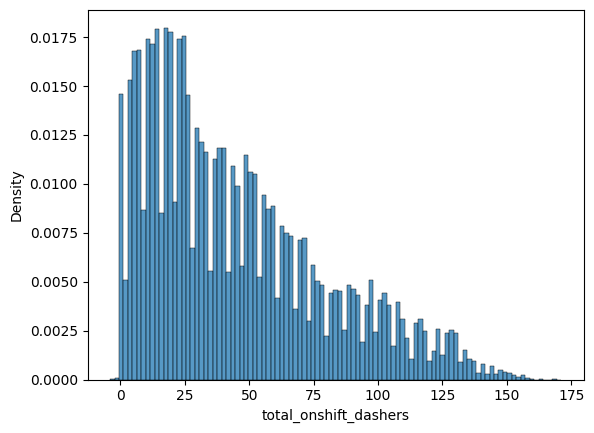

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


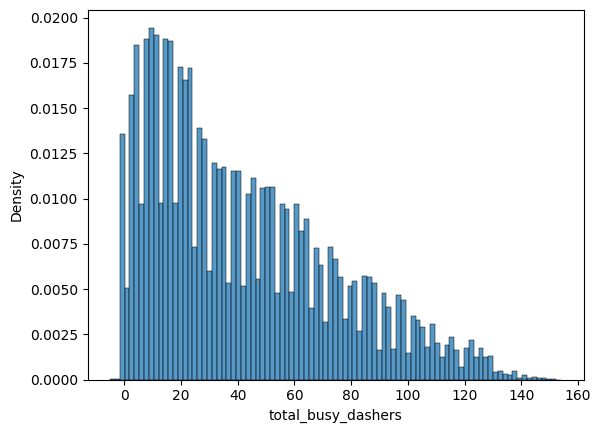

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


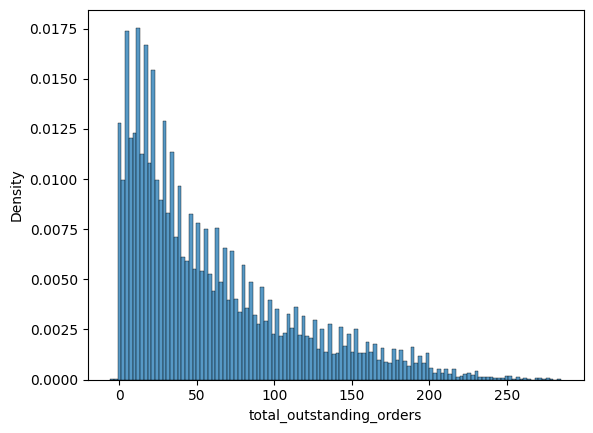

In [16]:
for col in cols_with_missing_values:
    sns.histplot(data=ddash, x=col, stat='density')
    plt.show()

In [17]:
cols_with_missing_values

Index(['total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders'],
      dtype='object')

In [18]:
ddash['total_onshift_dashers'].median()

37.0

In [19]:
ddash[cols_with_missing_values].astype(float)

,total_onshift_dashers,total_busy_dashers,total_outstanding_orders
0,33.0,14.0,21.0
1,1.0,2.0,2.0
8,8.0,6.0,18.0
14,5.0,6.0,8.0
15,5.0,5.0,7.0
...,...,...,...
197423,17.0,17.0,23.0
197424,12.0,11.0,14.0
197425,39.0,41.0,40.0
197426,7.0,7.0,12.0


In [20]:
nan_check = ddash[ddash['total_onshift_dashers'].isnull()]['total_onshift_dashers']

In [21]:
nan_check

160      NaN
161      NaN
162      NaN
163      NaN
164      NaN
          ..
197196   NaN
197197   NaN
197198   NaN
197199   NaN
197421   NaN
Name: total_onshift_dashers, Length: 15630, dtype: float64

In [22]:
ddash['total_onshift_dashers'].iloc[139]

nan

In [23]:
for col in cols_with_missing_values:
    print(ddash[col].median())

37.0
35.0
41.0


In [24]:
for col in cols_with_missing_values:
    ddash[col] = ddash[col].fillna(ddash[col].mean())

In [25]:
ddash['total_onshift_dashers'].iloc[160]

34.0

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


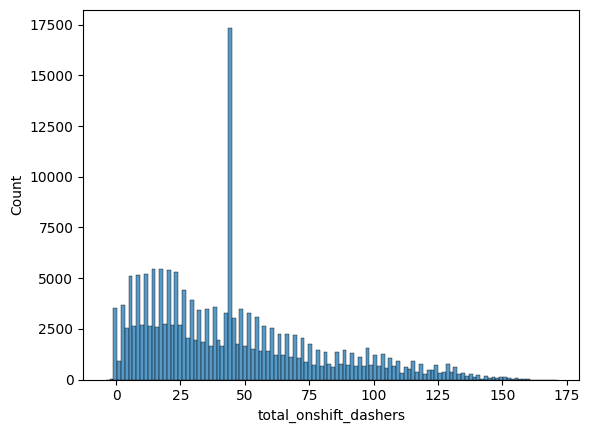

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


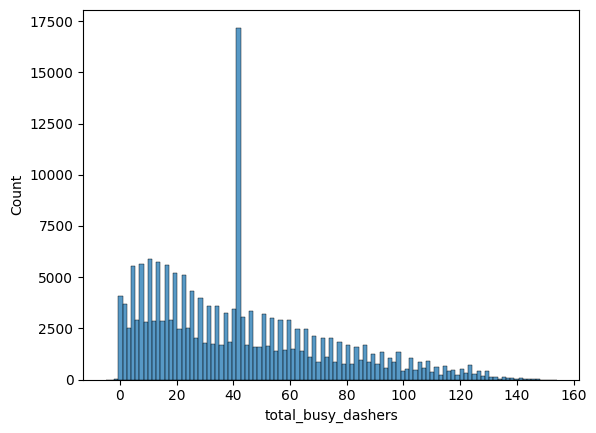

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


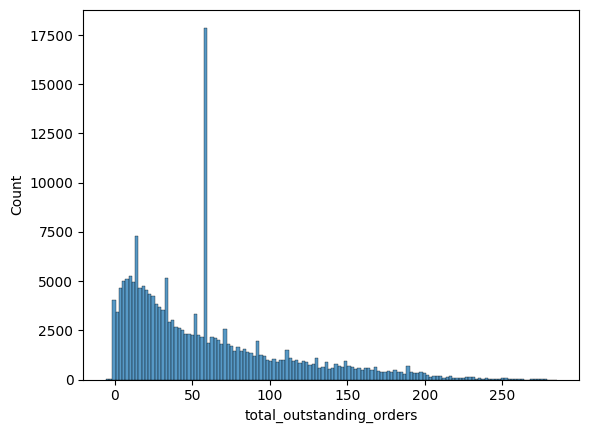

In [26]:
for col in cols_with_missing_values:
    sns.histplot(data=ddash, x=col)
    plt.show()

In [27]:
cols_with_missing_values

Index(['total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders'],
      dtype='object')

In [28]:
total_onshift_dashers_sqrt = np.sqrt(ddash['total_onshift_dashers'])

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [29]:
ddash['total_onshift_dashers'].std()

33.10424912754849

In [30]:
total_onshift_dashers_sqrt.std()

2.5931329748880882

In [31]:
ddash['total_onshift_dashers'].isna().sum()

0

In [32]:
ddash['actual_total_delivery_duration']

0         3779.0
1         4024.0
8         1586.0
14        2273.0
15        2988.0
           ...  
197423    3907.0
197424    3383.0
197425    3008.0
197426    3907.0
197427    2228.0
Name: actual_total_delivery_duration, Length: 191407, dtype: float64

In [33]:
ddash['total_busy_dashers']

0         14.0
1          2.0
8          6.0
14         6.0
15         5.0
          ... 
197423    17.0
197424    11.0
197425    41.0
197426     7.0
197427    20.0
Name: total_busy_dashers, Length: 191407, dtype: float64

In [34]:
ddash['total_onshift_dashers']

0         33.0
1          1.0
8          8.0
14         5.0
15         5.0
          ... 
197423    17.0
197424    12.0
197425    39.0
197426     7.0
197427    20.0
Name: total_onshift_dashers, Length: 191407, dtype: float64

In [35]:
ddash['busy_dashers_ratio'] = ddash['total_busy_dashers'] / ddash['total_onshift_dashers']

In [36]:
ddash['busy_dashers_ratio']

0         0.424242
1         2.000000
8         0.750000
14        1.200000
15        1.000000
            ...   
197423    1.000000
197424    0.916667
197425    1.051282
197426    1.000000
197427    1.000000
Name: busy_dashers_ratio, Length: 191407, dtype: float64

Delivery times compared to time of the day

In [37]:
ddash['actual_delivery_time_without_date'] = ddash['actual_delivery_time'].dt.time

In [38]:
ddash['actual_delivery_time_without_date']

0         23:27:16
1         22:56:29
8         00:38:01
14        04:14:39
15        03:02:24
            ...   
197423    01:24:48
197424    00:58:22
197425    05:36:16
197426    19:23:22
197427    20:01:41
Name: actual_delivery_time_without_date, Length: 191407, dtype: object

In [39]:
import datetime
def check_time(time):
    '''
        Takes time as datetime object and assigns time of the day
    '''
    time_ranges = [
        (datetime.time(6, 0), datetime.time(12, 0), 'morning'),
        (datetime.time(12, 0), datetime.time(18, 0), 'afternoon'),
        (datetime.time(18, 0), datetime.time(23, 59), 'evening')
    ]
    
    for start, end, label in time_ranges:
        if start <= time <= end:
            return label
    return 'night'

In [40]:
check_time.__doc__

'\n        Takes time as datetime object and assigns time of the day\n    '

In [41]:
ddash['time_of_the_day'] = ddash['actual_delivery_time_without_date'].apply(lambda x: check_time(x))
print(ddash['time_of_the_day'])

0         evening
1         evening
8           night
14          night
15          night
           ...   
197423      night
197424      night
197425      night
197426    evening
197427    evening
Name: time_of_the_day, Length: 191407, dtype: object


In [42]:
ddash

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,actual_delivery_time_without_date,time_of_the_day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,0.424242,23:27:16,evening
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2.000000,22:56:29,evening
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0,0.750000,00:38:01,night
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0,1.200000,04:14:39,night
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,2988.0,1.000000,03:02:24,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,3907.0,1.000000,01:24:48,night
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,3383.0,0.916667,00:58:22,night
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,3008.0,1.051282,05:36:16,night
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,3907.0,1.000000,19:23:22,evening


In [43]:
delivery_time_time_of_the_day_grouped = ddash.groupby('time_of_the_day')['actual_total_delivery_duration'].mean() / 60

<Axes: xlabel='Time of the day', ylabel='Delivery time (minutes)'>

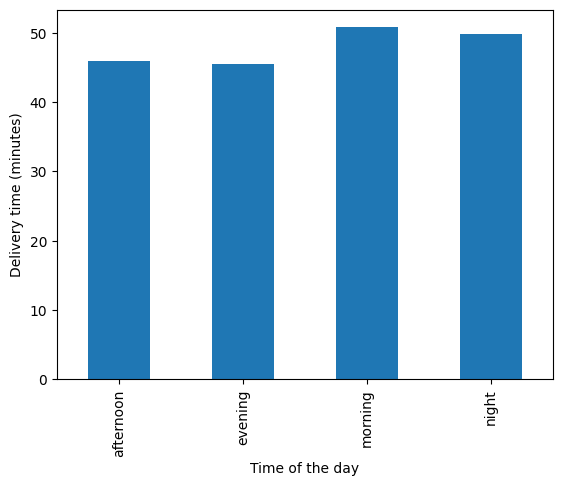

In [44]:
delivery_time_time_of_the_day_grouped.plot(kind='bar',
                                          xlabel='Time of the day',
                                          ylabel='Delivery time (minutes)')

Is localization depends on delivery time

In [45]:
delivery_time_market_id_grouped = ddash.groupby('market_id')['actual_total_delivery_duration'].mean() / 60

<Axes: xlabel='market_id (localization)', ylabel='Delivery time (minutes)'>

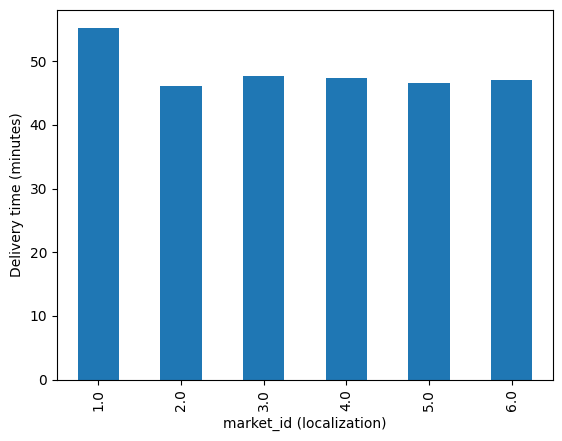

In [46]:
delivery_time_market_id_grouped.plot(kind='bar', 
                                     xlabel='market_id (localization)', 
                                     ylabel='Delivery time (minutes)')

Influence of restaurant type on delivery time

In [47]:
ddash

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,actual_delivery_time_without_date,time_of_the_day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,0.424242,23:27:16,evening
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2.000000,22:56:29,evening
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0,0.750000,00:38:01,night
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0,1.200000,04:14:39,night
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,2988.0,1.000000,03:02:24,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,3907.0,1.000000,01:24:48,night
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,3383.0,0.916667,00:58:22,night
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,3008.0,1.051282,05:36:16,night
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,3907.0,1.000000,19:23:22,evening


In [48]:
store_cat_delivery_time_grouped = ddash.groupby('store_primary_category')['actual_total_delivery_duration'].mean() / 60

In [49]:
store_cat_delivery_time_grouped

store_primary_category
afghan               51.274718
african              50.810000
alcohol              44.938360
alcohol-plus-food    50.766667
american             47.779504
                       ...    
thai                 48.614439
turkish              44.472175
vegan                47.903345
vegetarian           46.696778
vietnamese           45.347993
Name: actual_total_delivery_duration, Length: 74, dtype: float64

In [50]:
store_cat_delivery_time_grouped = store_cat_delivery_time_grouped.reset_index().sort_values(by='actual_total_delivery_duration')

In [51]:
store_cat_delivery_time_grouped

,store_primary_category,actual_total_delivery_duration
21,chocolate,34.133333
37,indonesian,40.750000
42,kosher,41.576144
33,gluten-free,42.028495
28,fast,43.852149
...,...,...
8,belgian,54.991667
9,brazilian,55.724405
17,caribbean,56.111111
65,spanish,56.178378


In [52]:
store_cat_delivery_time_grouped['store_primary_category'].unique()

array(['chocolate', 'indonesian', 'kosher', 'gluten-free', 'fast',
       'turkish', 'mexican', 'smoothie', 'sandwich', 'alcohol',
       'breakfast', 'hawaiian', 'vietnamese', 'persian', 'gastropub',
       'french', 'cafe', 'other', 'german', 'convenience-store',
       'vegetarian', 'singaporean', 'peruvian', 'mediterranean', 'burger',
       'soup', 'bubble-tea', 'asian', 'pasta', 'seafood', 'greek',
       'dim-sum', 'barbecue', 'pakistani', 'american', 'latin-american',
       'vegan', 'middle-eastern', 'chinese', 'british', 'korean',
       'nepalese', 'irish', 'catering', 'thai', 'european', 'dessert',
       'cheese', 'ethiopian', 'argentine', 'indian', 'filipino',
       'moroccan', 'salad', 'alcohol-plus-food', 'african', 'pizza',
       'comfort-food', 'southern', 'lebanese', 'afghan', 'russian',
       'sushi', 'steak', 'burmese', 'japanese', 'malaysian', 'cajun',
       'tapas', 'belgian', 'brazilian', 'caribbean', 'spanish', 'italian'],
      dtype=object)

[]

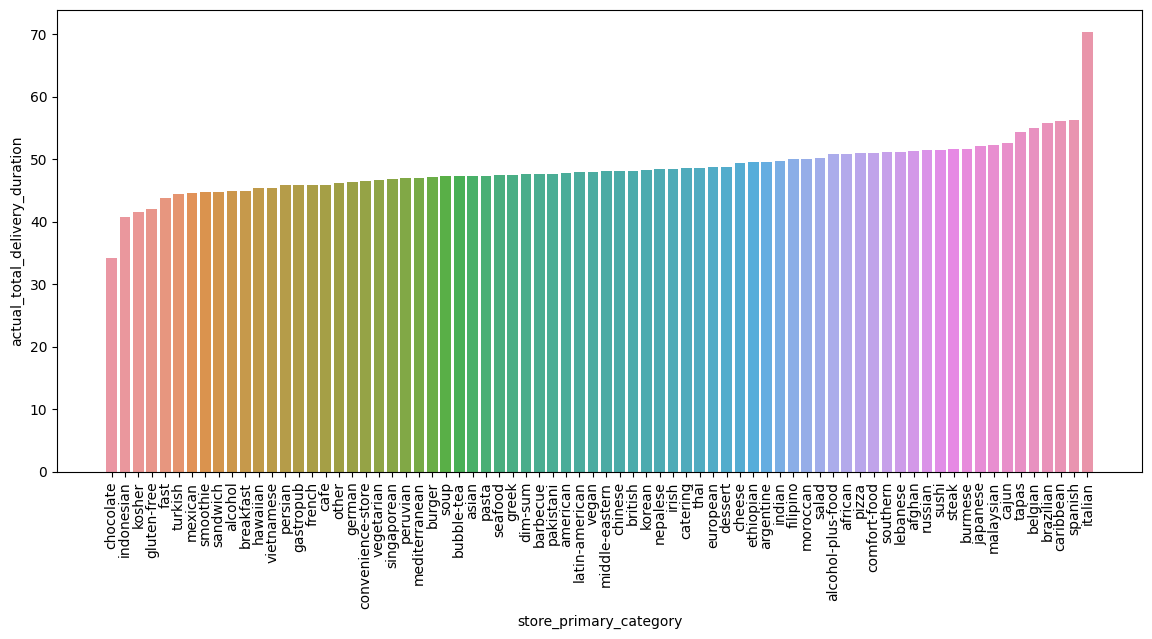

In [53]:
plt.figure(figsize=(14, 6))
sns.barplot(data=store_cat_delivery_time_grouped, x='store_primary_category', y='actual_total_delivery_duration', width=0.8)
plt.xticks(rotation=90)
plt.plot()

It is not very inuitive to drive insights from plot with 74 columns as well as take any conclusions from it, so lets reduce number of categories by mappig them to more general ones

In [54]:
cuisine_mapping = {
    'afghan': 'middle-eastern',
    'african': 'african',
    'alcohol': 'drinks',
    'alcohol-plus-food': 'drinks',
    'american': 'american',
    'argentine': 'latin-american',
    'asian': 'asian',
    'barbecue': 'american',
    'belgian': 'european',
    'brazilian': 'latin-american',
    'breakfast': 'breakfast',
    'british': 'european',
    'bubble-tea': 'drinks',
    'burger': 'american',
    'burmese': 'asian',
    'cafe': 'cafe',
    'cajun': 'american',
    'caribbean': 'latin-american',
    'catering': 'other',
    'cheese': 'other',
    'chinese': 'asian',
    'chocolate': 'desserts',
    'comfort-food': 'american',
    'convenience-store': 'other',
    'dessert': 'desserts',
    'dim-sum': 'asian',
    'ethiopian': 'african',
    'european': 'european',
    'fast': 'american',
    'filipino': 'asian',
    'french': 'european',
    'gastropub': 'american',
    'german': 'european',
    'gluten-free': 'special',
    'greek': 'european',
    'hawaiian': 'american',
    'indian': 'asian',
    'indonesian': 'asian',
    'irish': 'european',
    'italian': 'european',
    'japanese': 'asian',
    'korean': 'asian',
    'kosher': 'special',
    'latin-american': 'latin-american',
    'lebanese': 'middle-eastern',
    'malaysian': 'asian',
    'mediterranean': 'mediterranean',
    'mexican': 'latin-american',
    'middle-eastern': 'middle-eastern',
    'moroccan': 'african',
    'nepalese': 'asian',
    'other': 'other',
    'pakistani': 'asian',
    'pasta': 'european',
    'persian': 'middle-eastern',
    'peruvian': 'latin-american',
    'pizza': 'european',
    'russian': 'european',
    'salad': 'special',
    'sandwich': 'american',
    'seafood': 'seafood',
    'singaporean': 'asian',
    'smoothie': 'drinks',
    'soup': 'other',
    'southern': 'american',
    'spanish': 'european',
    'steak': 'american',
    'sushi': 'asian',
    'tapas': 'european',
    'thai': 'asian',
    'turkish': 'european',
    'vegan': 'special',
    'vegetarian': 'special',
    'vietnamese': 'asian'
}

ddash['general_cuisine_category'] = ddash['store_primary_category'].map(cuisine_mapping)

In [55]:
ddash['general_cuisine_category'].value_counts()

general_cuisine_category
american          53414
asian             48188
european          29570
latin-american    18391
desserts           8723
other              6025
mediterranean      5473
breakfast          5382
special            4948
drinks             3988
seafood            2710
middle-eastern     2218
cafe               2208
african             169
Name: count, dtype: int64

In [56]:
store_cat_delivery_time_grouped = ddash.groupby('general_cuisine_category')['actual_total_delivery_duration'].mean() / 60
store_cat_delivery_time_grouped = store_cat_delivery_time_grouped.reset_index().sort_values(by='actual_total_delivery_duration')

[]

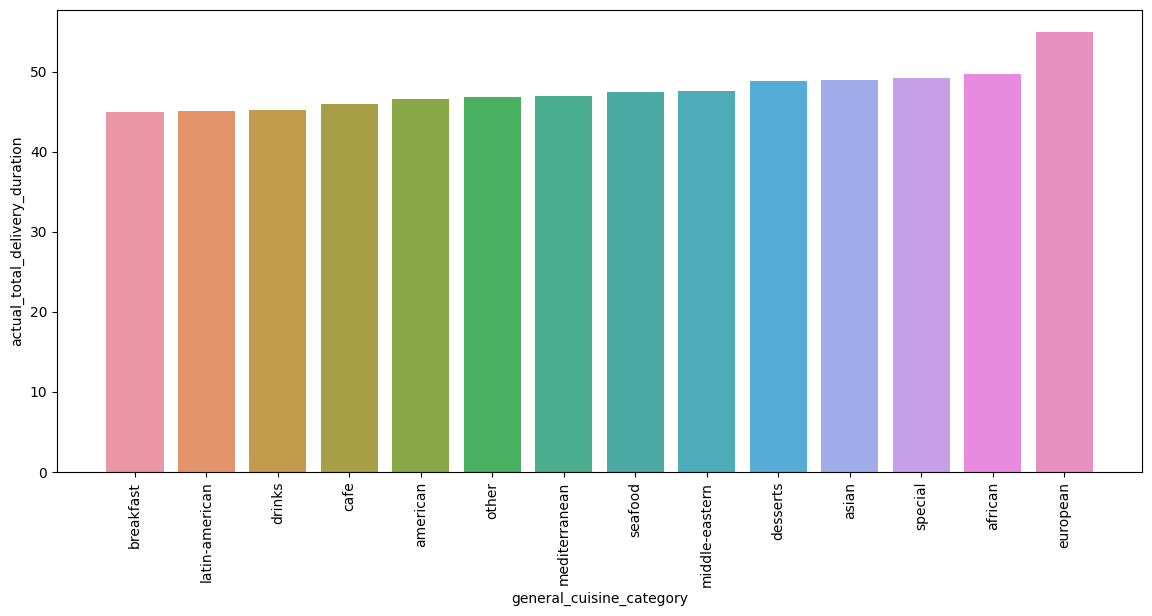

In [57]:
plt.figure(figsize=(14, 6))
sns.barplot(data=store_cat_delivery_time_grouped, x='general_cuisine_category', y='actual_total_delivery_duration', width=0.8)
plt.xticks(rotation=90)
plt.plot()

Item count impact on delivery time

In [59]:
ddash.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,actual_delivery_time_without_date,time_of_the_day,general_cuisine_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,...,33.0,14.0,21.0,446,861.0,3779.0,0.424242,23:27:16,evening,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,...,1.0,2.0,2.0,446,690.0,4024.0,2.000000,22:56:29,evening,latin-american
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,...,8.0,6.0,18.0,446,289.0,1586.0,0.750000,00:38:01,night,asian
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,...,5.0,6.0,8.0,446,795.0,2273.0,1.200000,04:14:39,night,european
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,...,5.0,5.0,7.0,446,205.0,2988.0,1.000000,03:02:24,night,european


In [67]:
ddash['actual_total_delivery_duration'].sort_values(ascending=False)

2690      8516859.0
185550     373879.0
27189      332482.0
83055       57032.0
190860      54447.0
            ...    
117928        325.0
42507         321.0
30562         297.0
862           223.0
63294         101.0
Name: actual_total_delivery_duration, Length: 191407, dtype: float64

In [75]:
ddash.loc[2690]

market_id                                                       1.0
created_at                                      2014-10-19 05:24:15
actual_delivery_time                            2015-01-25 19:11:54
store_id                                                       3560
store_primary_category                                      italian
order_protocol                                                  1.0
total_items                                                       1
subtotal                                                       1695
num_distinct_items                                                1
min_item_price                                                 1595
max_item_price                                                 1595
total_onshift_dashers                                     44.918664
total_busy_dashers                                        41.861381
total_outstanding_orders                                  58.230115
estimated_order_place_duration                  

<Axes: xlabel='actual_total_delivery_duration', ylabel='total_items'>

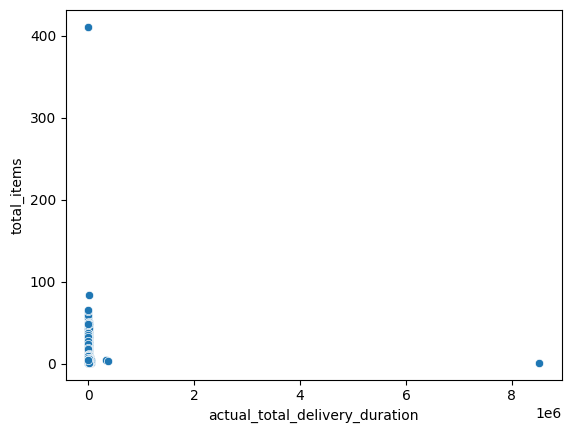

In [77]:
sns.scatterplot(data=ddash, x='actual_total_delivery_duration', y='total_items')

(0.0, 100.0)

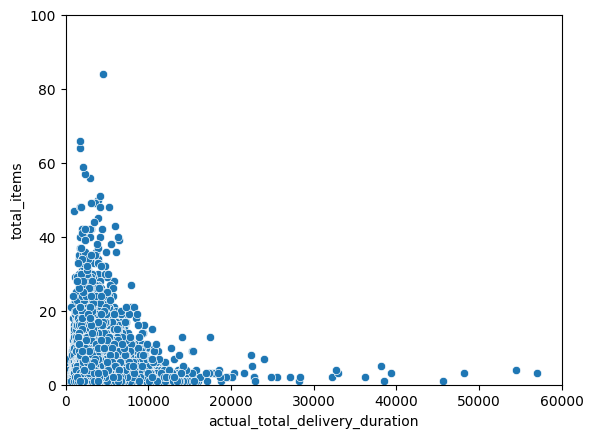

In [80]:
sns.scatterplot(data=ddash, x='actual_total_delivery_duration', y='total_items')
plt.xlim(0, 60000)
plt.ylim(0, 100)

(0.0, 60000.0)

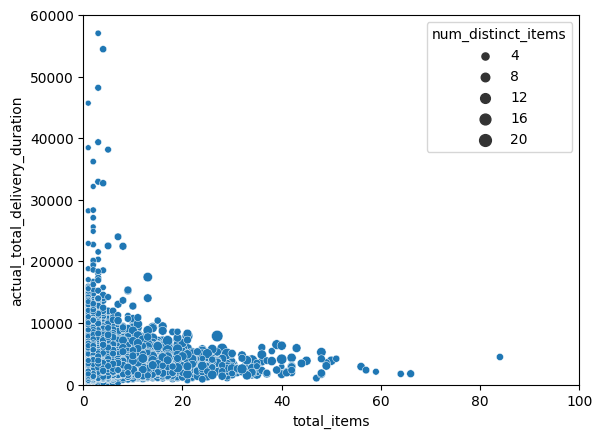

In [86]:
sns.scatterplot(data=ddash, x='total_items', y='actual_total_delivery_duration', size='num_distinct_items')
plt.xlim(0, 100)
plt.ylim(0, 60000)

In [87]:
ddash['total_items'].corr(ddash['actual_total_delivery_duration'])

0.00470980600436065

A value of 0.0047 suggests an almost zero linear relationship between the number of items in an order and delivery time. In other words, changing the number of items in an order has almost no effect on changing the actual delivery time.

Available dashers value vs delivery time

In [88]:
ddash.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,actual_delivery_time_without_date,time_of_the_day,general_cuisine_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,...,33.0,14.0,21.0,446,861.0,3779.0,0.424242,23:27:16,evening,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,...,1.0,2.0,2.0,446,690.0,4024.0,2.000000,22:56:29,evening,latin-american
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,...,8.0,6.0,18.0,446,289.0,1586.0,0.750000,00:38:01,night,asian
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,...,5.0,6.0,8.0,446,795.0,2273.0,1.200000,04:14:39,night,european
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,...,5.0,5.0,7.0,446,205.0,2988.0,1.000000,03:02:24,night,european


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_onshift_dashers', ylabel='Count'>

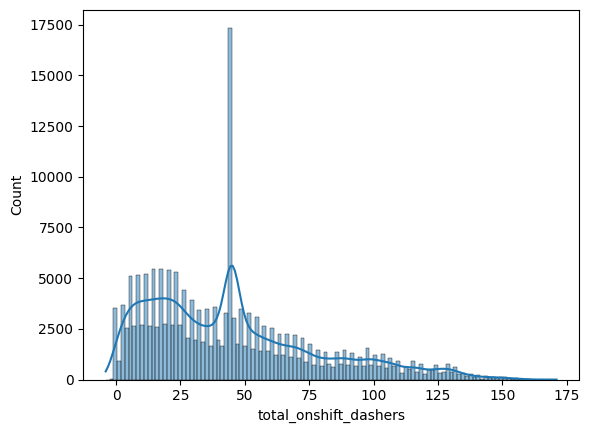

In [89]:
sns.histplot(ddash['total_onshift_dashers'], kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_busy_dashers', ylabel='Count'>

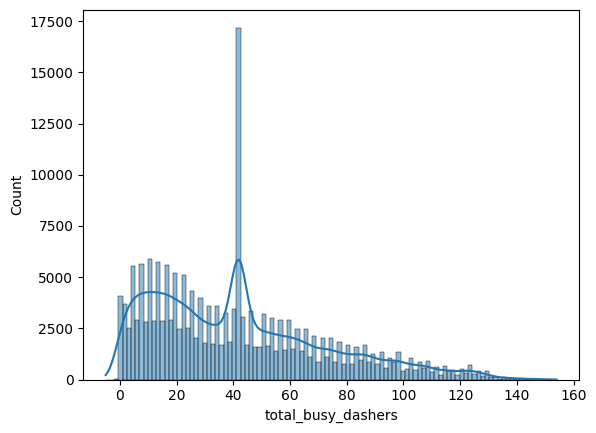

In [91]:
sns.histplot(ddash['total_busy_dashers'], kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_outstanding_orders', ylabel='Count'>

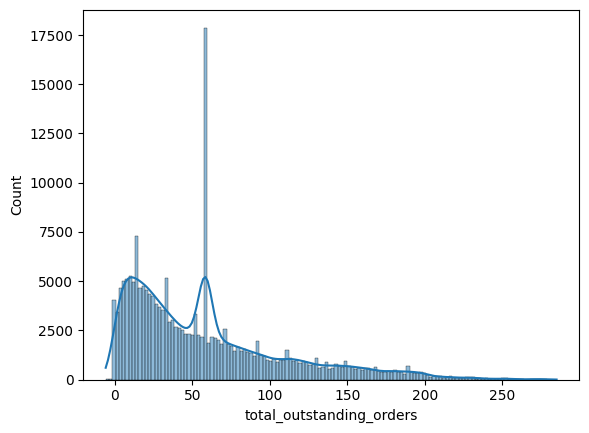

In [92]:
sns.histplot(ddash['total_outstanding_orders'], kde=True)

In [94]:
corr_onshift = ddash['total_onshift_dashers'].corr(ddash['actual_total_delivery_duration'])
corr_busy = ddash['total_busy_dashers'].corr(ddash['actual_total_delivery_duration'])
corr_outstanding = ddash['total_outstanding_orders'].corr(ddash['actual_total_delivery_duration'])

print("Korelacja liczby dostępnych dostawców z czasem dostawy:", corr_onshift)
print("Korelacja liczby zajętych dostawców z czasem dostawy:", corr_busy)
print("Korelacja liczby zamówień w trakcie realizacji z czasem dostawy:", corr_outstanding)

Korelacja liczby dostępnych dostawców z czasem dostawy: 0.003856468053662869
Korelacja liczby zajętych dostawców z czasem dostawy: 0.004960230755834575
Korelacja liczby zamówień w trakcie realizacji z czasem dostawy: 0.009944710427144246


(0.0, 20000.0)

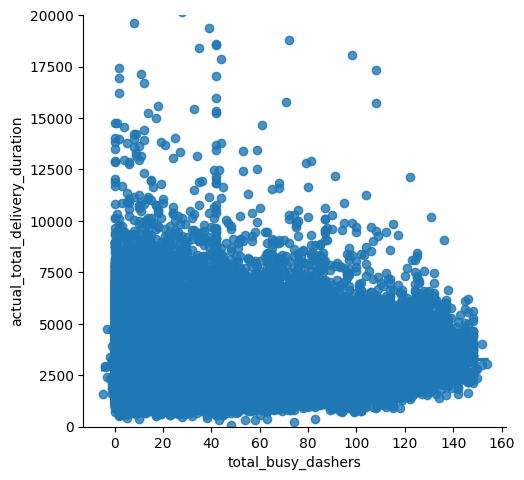

In [97]:
sns.lmplot(x='total_busy_dashers', y='actual_total_delivery_duration', data=ddash)
plt.ylim(0, 20000)